In [1]:
%matplotlib inline
import pandas as pd
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import wordcloud
import ImageDraw
import ImageFont
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import os
import re
from collections import Counter

In [8]:
reddit = pd.read_csv("comments.csv")                                                                           

#source is https://github.com/amueller/word_cloud/blob/master/examples/masked.py
def make_wordcloud(company):
    filtered = reddit[reddit['company']==company]
    txt = ''.join(filtered.body)
    cv = CountVectorizer(min_df=0, stop_words="english", max_features=200)
    counts = cv.fit_transform([txt]).toarray().ravel()                                                  
    words = np.array(cv.get_feature_names()) 
    counts = counts / float(counts.max())
    img_grey = Image.new("L", (30, 30))
    draw = ImageDraw.Draw(img_grey)
    wc = WordCloud(background_color="black", max_words=2000,stopwords=STOPWORDS.add("said"))
    wc.generate(txt)
    wc.to_file(""+str(company)+'.png')

In [67]:
company = pd.read_csv("companies.csv")

In [68]:

#make_wordcloud("Airbnb")
for i in company.values:
    try:
        print str(i[0])
        make_wordcloud(str(i[0]))
    except:
        pass

Google
Apple
Amazon
Uber
Lyft
Airbnb
Fitbit
Jawbone
Microsoft
Coursera
Athenahealth
Aetna
Twitter
Snapchat
Dropbox
Spotify
Zocdoc
Asana
LinkedIn
Oscar_Health
Chartboost
Groupon
Wayfair
Instagram
Buzzfeed
Pinterest
Laserfiche
Palantir
Kayak
Grubhub
Box
Hubspot
Square
AppNexus
Quora
Vivint
Rivot
Riot_Games
EA
YikYak
Misfit
DoorDash
Birchbox
Slack
Tinder
Gilt
GitHub
Zenefits


In [9]:
def strip_string(a):
    return re.split(' ', a)

def filter_company(company):
    filtered = reddit[reddit['company']==company]
    txt = ''.join(filtered.body)
    return re.split(' ', txt)

In [12]:
diction = {}
temp = Counter(filter_company('Google')).most_common(20)
for a,b in temp:
    diction[a] = b

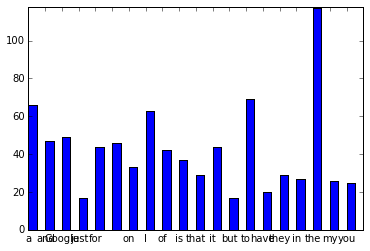

In [38]:
d = diction
X = np.arange(len(d))
plt.bar(X, d.values(), width=0.5)
plt.xticks(X, d.keys())
ymax = max(d.values()) + 1
plt.ylim(0, ymax)
plt.show()

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

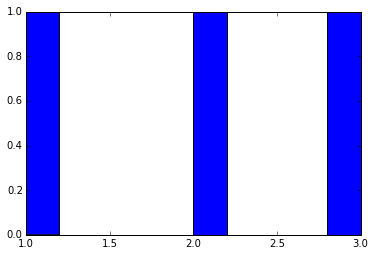

In [3]:
plt.hist([1,2,3])